In [5]:
import numpy as np
# 基本のライブラリを読み込む
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
serialData = pd.read_csv("../../output/20211005-013421-hb.csv")
serialData

,time,y
0,2588.506667,76.588694
1,2598.555556,76.717539
2,2608.604444,76.850181
3,2618.653333,76.986618
4,2628.702222,77.126852
...,...,...
5998,62386.988956,75.912457
5999,62396.991717,75.933455
6000,62406.994478,75.955045
6001,62416.997239,75.977227


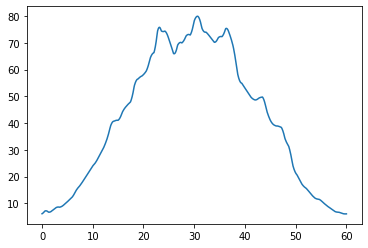

In [7]:
data = serialData

n = len(data["y"])
hamming = np.hamming(n)  # ハミング窓

dt = 0.01  # サンプリング間隔
freq = np.linspace(0, 1.0 / dt, n)  # 周波数軸

f = np.fft.fft(data["y"] * hamming, norm = "ortho")
amp = np.abs(f)
# パワースペクトルの計算（振幅スペクトルの二乗）
# Pow = amp ** 2

t = np.arange(0, n * dt, dt)  # 時間軸
plt.plot(t, data["y"] * hamming)
#
#
# self.ax.set_ylim(0, max(f_abs))
# self.ax.set_xlim(0, len(f_abs))
#
# self.baseline.set_data(list(range(len(f_abs))), f_abs)

/var/folders/9j/zzc0sqj10pz_wfd3_wyxcvwr0000gn/T/ipykernel_11373/2185577218.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, max(amp))


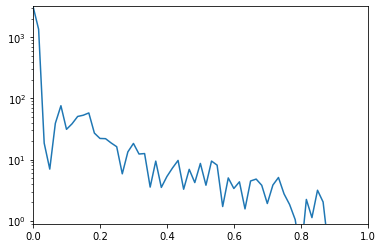

In [8]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_ylim(0, max(amp))
ax.set_xlim(0, 1)
ax.plot(freq, amp)

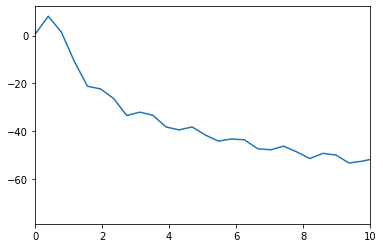

In [14]:
from scipy import signal

freq5, P5 = signal.welch(data["y"], 1.0 / dt)
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.plot(freq5, 10 * np.log10(P5))